**Importing Packages**

In [ ]:
import numpy as np
import pandas as pd

**Loading Dataset**

In [ ]:
like_songs = pd.read_csv('group 5 spotify.csv')
dislike_songs = pd.read_csv('group 5 spotify 2.csv')

In [ ]:
# First 5 songs in Spotify playlist with our liked songs
like_songs.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Tom Lee Hong Kong Youth NeoWinds Orchestra,"2011 WASBE Chiayi City, Taiwan: Tom Lee Hong K...","Hymn to the Sun, ""With the Beat of Mother Earth""",4olLv2XSxKmEYFeA6JtuJ2,0.161,0.293,7,-15.691,0,0.0415,0.569000,0.6610,0.0572,78.331,561640,4
1,LANY,Malibu Nights,Malibu Nights,0Eqg0CQ7bK3RQIMPw1A7pl,0.559,0.422,11,-11.890,1,0.1950,0.000002,0.0853,0.1910,74.002,286928,4
2,Ed Sheeran,+,Give Me Love,0SuG9kyzGRpDqrCWtgD6Lq,0.526,0.328,1,-9.864,1,0.0461,0.000000,0.1120,0.1100,116.068,526387,4
3,Coastal Communities Concert Band,37th Anniversary Concert 2020,Persis Overture - Live,0U8Di9rRSR7xvxn0fJAaAp,0.318,0.219,7,-17.426,0,0.0406,0.913000,0.7760,0.2930,134.380,500973,4
4,One Direction,Take Me Home (Expanded Edition),Little Things,0TAmnCzOtqRfvA38DDLTjj,0.709,0.220,7,-11.856,1,0.0327,0.000000,0.1750,0.5300,110.076,219040,4


In [ ]:
# Last 5 songs in Spotify playlist with our liked songs
like_songs.tail()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
95,JJ Lin,JJ林俊傑100天,第幾個100天,2tXTEROacuvyybcZoX9RmT,0.247,0.475,0,-6.658,1,0.0286,0.00000,0.1300,0.201,96.429,278895,3
96,Cass Elliot,Dream A Little Dream Of Me,Dream A Little Dream Of Me,3cOWCcBKwiwUs5PCYirwMI,0.410,0.532,11,-10.394,0,0.1950,0.00000,0.6980,0.406,134.128,221373,4
97,Baek Ji Young,I still love you a lot,I still love you a lot,2zCORPZHF7g9SPjZfrGVuy,0.548,0.404,4,-5.618,1,0.0314,0.00000,0.0791,0.486,129.795,227867,4
98,TOTO,Toto IV,Africa,2374M0fQpWi3dLnB54qaLX,0.671,0.373,9,-18.064,1,0.0323,0.00008,0.0481,0.732,92.718,295893,4
99,Avril Lavigne,Goodbye Lullaby (Deluxe Edition),Wish You Were Here,72po8JKu6e1hLtQ7kGJPg3,0.460,0.866,1,-3.864,0,0.0559,0.00000,0.1900,0.345,165.956,225680,4


In [ ]:
# First 5 songs in Spotify playlist with our disliked songs
dislike_songs.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Katy Perry,Smile,Cry About It Later,7cLrrJ1Dk6WAQyDIj9j26A,0.699,0.669,2,-5.829,0,0.0712,0.000017,0.2480,0.4440,125.994,189773,4
1,Meghan Trainor,TREAT MYSELF (DELUXE),You Don't Know Me,3xGTNPcwsvonkWUQV1Wsqu,0.579,0.763,9,-4.155,0,0.0717,0.000000,0.2050,0.6170,106.029,210834,4
2,Justin Bieber,Lonely (with benny blanco),Lonely (with benny blanco),4y4spB9m0Q6026KfkAvy9Q,0.631,0.239,11,-7.071,0,0.0398,0.000000,0.1160,0.0927,79.859,149297,4
3,Shawn Mendes,Monster,Monster (Shawn Mendes & Justin Bieber),2Z8yfpFX0ZMavHkcIeHiO1,0.652,0.383,2,-7.076,0,0.0516,0.000000,0.0828,0.5490,145.765,178994,4
4,Justin Bieber,Purpose (Deluxe),Love Yourself,1f8zcJPvJKvxAOjEqM0pyc,0.609,0.378,4,-9.828,1,0.4380,0.000000,0.2800,0.5150,100.418,233720,4


In [ ]:
# Last 5 songs in Spotify playlist with our disliked songs
dislike_songs.tail()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
95,Brent Faiyaz,Fuck The World,Let Me Know,0dJhXJKZTpiaxTUc7uItIN,0.743,0.548,6,-6.545,0,0.0947,0.000180,0.088,0.558,85.017,215058,4
96,Mac Miller,Circles,Good News,1DWZUa5Mzf2BwzpHtgbHPY,0.794,0.320,1,-12.920,0,0.1730,0.134000,0.112,0.241,174.088,342040,4
97,Halsey,Manic,You should be sad,7lidXGPXPYLNThITAOTlkK,0.591,0.585,2,-6.350,1,0.0277,0.000000,0.109,0.324,110.940,205473,4
98,H.E.R.,Sometimes,Sometimes,2m0pzukUN2eFutFjnXNFXF,0.540,0.617,3,-7.560,0,0.0723,0.000854,0.109,0.369,151.838,273751,4
99,Chris Brown,Slime & B,Go Crazy,1IIKrJVP1C9N7iPtG6eOsK,0.755,0.578,0,-8.932,0,0.1450,0.000000,0.250,0.581,94.148,176960,4


**Exploratory Data Analysis**

In [ ]:
# Columns in our dataset
like_songs.columns

Index(['artist', 'album', 'track_name', 'track_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [ ]:
# Describing the columns in our liked songs dataset
like_songs.describe()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.551960,0.523324,5.430000,-7.867940,0.830000,0.057327,0.045659,0.200942,0.373591,119.756020,260022.800000,3.940000
std,0.151527,0.199619,3.593639,3.473365,0.377525,0.048058,0.171749,0.180012,0.211411,29.301727,88006.034145,0.238683
min,0.161000,0.092400,0.000000,-18.064000,0.000000,0.024300,0.000000,0.033300,0.057200,71.994000,160347.000000,3.000000
25%,0.467500,0.381250,2.000000,-9.537750,1.000000,0.032375,0.000000,0.096600,0.190000,94.411750,208673.750000,4.000000
50%,0.553500,0.485000,5.500000,-7.150500,1.000000,0.041850,0.000002,0.116000,0.334000,119.930000,235966.500000,4.000000
75%,0.667000,0.655000,8.000000,-5.660750,1.000000,0.059725,0.000133,0.237750,0.493500,138.633750,283189.750000,4.000000
max,0.897000,0.941000,11.000000,-0.323000,1.000000,0.360000,0.913000,0.795000,0.884000,192.099000,663333.000000,4.000000


**Classification Like or Dislike**

In [ ]:
# classification, 1 for like, 0 for dislike
# Adding the song_like column to our liked songs dataframe
like_songs['song_like'] = np.ones((len(like_songs), 1), dtype=int)
like_songs.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_like
0,Tom Lee Hong Kong Youth NeoWinds Orchestra,"2011 WASBE Chiayi City, Taiwan: Tom Lee Hong K...","Hymn to the Sun, ""With the Beat of Mother Earth""",4olLv2XSxKmEYFeA6JtuJ2,0.161,0.293,7,-15.691,0,0.0415,0.569000,0.6610,0.0572,78.331,561640,4,1
1,LANY,Malibu Nights,Malibu Nights,0Eqg0CQ7bK3RQIMPw1A7pl,0.559,0.422,11,-11.890,1,0.1950,0.000002,0.0853,0.1910,74.002,286928,4,1
2,Ed Sheeran,+,Give Me Love,0SuG9kyzGRpDqrCWtgD6Lq,0.526,0.328,1,-9.864,1,0.0461,0.000000,0.1120,0.1100,116.068,526387,4,1
3,Coastal Communities Concert Band,37th Anniversary Concert 2020,Persis Overture - Live,0U8Di9rRSR7xvxn0fJAaAp,0.318,0.219,7,-17.426,0,0.0406,0.913000,0.7760,0.2930,134.380,500973,4,1
4,One Direction,Take Me Home (Expanded Edition),Little Things,0TAmnCzOtqRfvA38DDLTjj,0.709,0.220,7,-11.856,1,0.0327,0.000000,0.1750,0.5300,110.076,219040,4,1


In [ ]:
# Adding the song_like column to our disliked songs dataframe
dislike_songs['song_like'] = np.zeros((len(dislike_songs), 1), dtype=int)
dislike_songs.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_like
0,Katy Perry,Smile,Cry About It Later,7cLrrJ1Dk6WAQyDIj9j26A,0.699,0.669,2,-5.829,0,0.0712,0.000017,0.2480,0.4440,125.994,189773,4,0
1,Meghan Trainor,TREAT MYSELF (DELUXE),You Don't Know Me,3xGTNPcwsvonkWUQV1Wsqu,0.579,0.763,9,-4.155,0,0.0717,0.000000,0.2050,0.6170,106.029,210834,4,0
2,Justin Bieber,Lonely (with benny blanco),Lonely (with benny blanco),4y4spB9m0Q6026KfkAvy9Q,0.631,0.239,11,-7.071,0,0.0398,0.000000,0.1160,0.0927,79.859,149297,4,0
3,Shawn Mendes,Monster,Monster (Shawn Mendes & Justin Bieber),2Z8yfpFX0ZMavHkcIeHiO1,0.652,0.383,2,-7.076,0,0.0516,0.000000,0.0828,0.5490,145.765,178994,4,0
4,Justin Bieber,Purpose (Deluxe),Love Yourself,1f8zcJPvJKvxAOjEqM0pyc,0.609,0.378,4,-9.828,1,0.4380,0.000000,0.2800,0.5150,100.418,233720,4,0


In [ ]:
# Dimensions of liked songs dataframe
like_songs.shape

(100, 17)

In [ ]:
# Dimensions of disliked songs dataframe
dislike_songs.shape

(100, 17)

In [ ]:
# Combine the liked_songs and disliked_songs dataframe
songs = like_songs.append(dislike_songs,ignore_index=False)
songs.shape

# should be 200 (like_songs+dislike_songs = 200 songs)

(200, 17)

In [ ]:
# First 5 songs of combined dataframe
songs.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_like
0,Tom Lee Hong Kong Youth NeoWinds Orchestra,"2011 WASBE Chiayi City, Taiwan: Tom Lee Hong K...","Hymn to the Sun, ""With the Beat of Mother Earth""",4olLv2XSxKmEYFeA6JtuJ2,0.161,0.293,7,-15.691,0,0.0415,0.569000,0.6610,0.0572,78.331,561640,4,1
1,LANY,Malibu Nights,Malibu Nights,0Eqg0CQ7bK3RQIMPw1A7pl,0.559,0.422,11,-11.890,1,0.1950,0.000002,0.0853,0.1910,74.002,286928,4,1
2,Ed Sheeran,+,Give Me Love,0SuG9kyzGRpDqrCWtgD6Lq,0.526,0.328,1,-9.864,1,0.0461,0.000000,0.1120,0.1100,116.068,526387,4,1
3,Coastal Communities Concert Band,37th Anniversary Concert 2020,Persis Overture - Live,0U8Di9rRSR7xvxn0fJAaAp,0.318,0.219,7,-17.426,0,0.0406,0.913000,0.7760,0.2930,134.380,500973,4,1
4,One Direction,Take Me Home (Expanded Edition),Little Things,0TAmnCzOtqRfvA38DDLTjj,0.709,0.220,7,-11.856,1,0.0327,0.000000,0.1750,0.5300,110.076,219040,4,1


In [ ]:
# Last 5 songs of combined dataframe
songs.tail()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_like
95,Brent Faiyaz,Fuck The World,Let Me Know,0dJhXJKZTpiaxTUc7uItIN,0.743,0.548,6,-6.545,0,0.0947,0.000180,0.088,0.558,85.017,215058,4,0
96,Mac Miller,Circles,Good News,1DWZUa5Mzf2BwzpHtgbHPY,0.794,0.320,1,-12.920,0,0.1730,0.134000,0.112,0.241,174.088,342040,4,0
97,Halsey,Manic,You should be sad,7lidXGPXPYLNThITAOTlkK,0.591,0.585,2,-6.350,1,0.0277,0.000000,0.109,0.324,110.940,205473,4,0
98,H.E.R.,Sometimes,Sometimes,2m0pzukUN2eFutFjnXNFXF,0.540,0.617,3,-7.560,0,0.0723,0.000854,0.109,0.369,151.838,273751,4,0
99,Chris Brown,Slime & B,Go Crazy,1IIKrJVP1C9N7iPtG6eOsK,0.755,0.578,0,-8.932,0,0.1450,0.000000,0.250,0.581,94.148,176960,4,0


In [ ]:
# Drop duplicated songs
songs = songs.drop_duplicates()
songs.shape

(200, 17)

In [ ]:
# we are predicting whether the user like a song or not
# Drop track_id and album columns because not important
songs = songs.drop(['track_id','album'], axis = 1)
songs.head()

,artist,track_name,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_like
0,Tom Lee Hong Kong Youth NeoWinds Orchestra,"Hymn to the Sun, ""With the Beat of Mother Earth""",0.161,0.293,7,-15.691,0,0.0415,0.569000,0.6610,0.0572,78.331,561640,4,1
1,LANY,Malibu Nights,0.559,0.422,11,-11.890,1,0.1950,0.000002,0.0853,0.1910,74.002,286928,4,1
2,Ed Sheeran,Give Me Love,0.526,0.328,1,-9.864,1,0.0461,0.000000,0.1120,0.1100,116.068,526387,4,1
3,Coastal Communities Concert Band,Persis Overture - Live,0.318,0.219,7,-17.426,0,0.0406,0.913000,0.7760,0.2930,134.380,500973,4,1
4,One Direction,Little Things,0.709,0.220,7,-11.856,1,0.0327,0.000000,0.1750,0.5300,110.076,219040,4,1


In [ ]:
# drop track_name cuz we are going to build a model
# we do not drop previously, cuz we will need track_name and artist to 
# show case our results
prediction = songs.drop(['track_name','artist'], axis = 1)

In [ ]:
prediction.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_like
0,0.161,0.293,7,-15.691,0,0.0415,0.569000,0.6610,0.0572,78.331,561640,4,1
1,0.559,0.422,11,-11.890,1,0.1950,0.000002,0.0853,0.1910,74.002,286928,4,1
2,0.526,0.328,1,-9.864,1,0.0461,0.000000,0.1120,0.1100,116.068,526387,4,1
3,0.318,0.219,7,-17.426,0,0.0406,0.913000,0.7760,0.2930,134.380,500973,4,1
4,0.709,0.220,7,-11.856,1,0.0327,0.000000,0.1750,0.5300,110.076,219040,4,1


**Data Visualization**

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

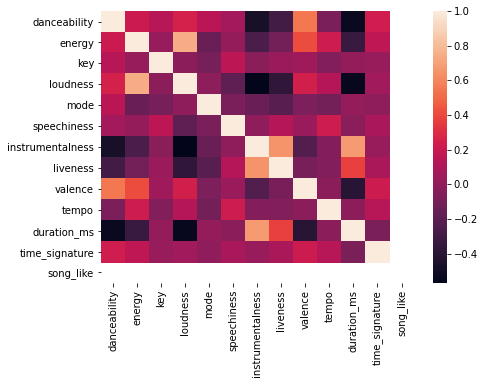

In [ ]:
# Сorrelation matrix
plt.figure(figsize=[7,5])
sns.heatmap(like_songs.corr())
plt.show()

Text(0.5, 1.0, 'Artist Name vs Count of songs')

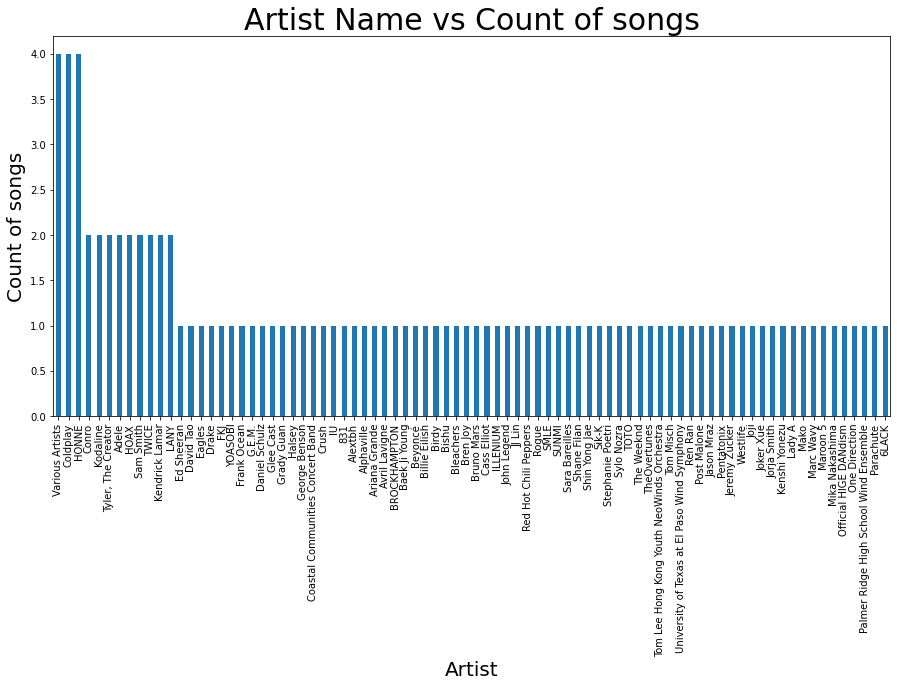

In [ ]:
# Bar chart showing artists with a higher song count in our liked songs playlist
fig = plt.figure(figsize = (15,7))
like_songs.groupby('artist')['track_name'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Artist', fontsize = 20)
plt.ylabel('Count of songs', fontsize = 20)
plt.title('Artist Name vs Count of songs', fontsize = 30)

In [ ]:
# Object data to category
for col in like_songs.select_dtypes(include=['object']).columns:
   like_songs[col] = like_songs[col].astype('category')
    
# Encoding categorical features
for col in like_songs.select_dtypes(include=['category']).columns:
   like_songs[col] = like_songs[col].cat.codes

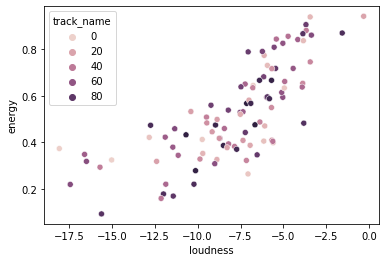

In [ ]:
# Scatter plot showing relationship between loudness and energy of our liked songs
sns.scatterplot(data=like_songs, x='loudness', y='energy', hue='track_name')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

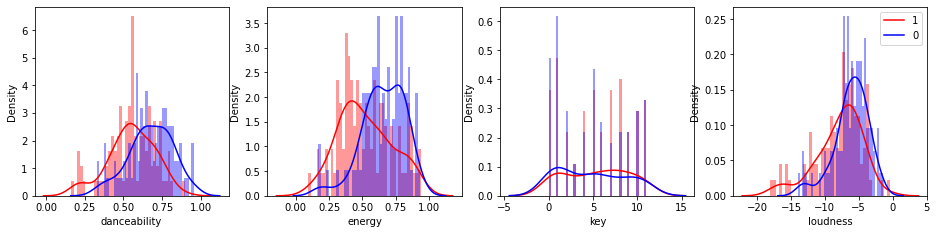

In [ ]:
# Visualization of danceability, energy, key and loudness song data
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['danceability'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['danceability'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['energy'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['energy'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['key'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['key'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['loudness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

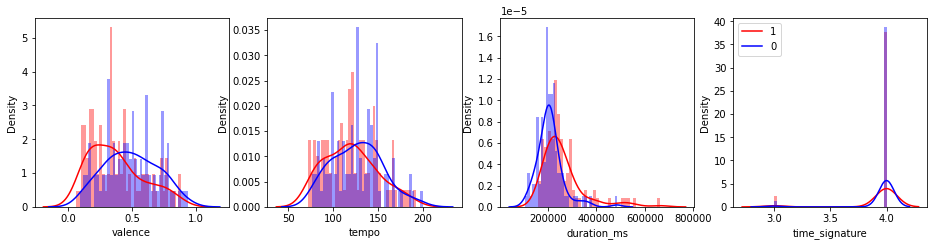

In [ ]:
 # Visualization of valence, tempo, duration_ms and time signature data
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['valence'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['valence'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['tempo'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['tempo'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['duration_ms'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['duration_ms'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['time_signature'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['time_signature'], color='blue', bins=40)
plt.legend((1,0))

Text(0.5, 0, 'artist')

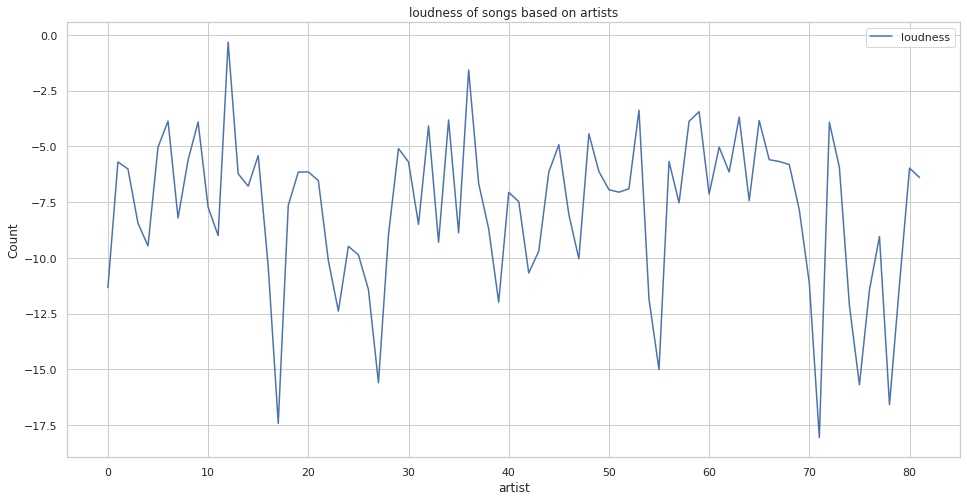

In [ ]:
# Loudness of songs based on artists
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["loudness"]
for col in columns:
    x = like_songs.groupby("artist")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('loudness of songs based on artists')
ax.set_ylabel('Count')
ax.set_xlabel('artist')

**Building Machine Learning Models**

**1. Logistic Regression**

In [ ]:
# four new df are created for building the classifier
X_train = prediction.drop('song_like', axis=1)
X_test = songs.drop(['song_like','track_name','artist'], axis=1)
y_train = prediction['song_like']
y_test = songs['song_like']

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.161,0.293,7,-15.691,0,0.0415,0.569000,0.6610,0.0572,78.331,561640,4
1,0.559,0.422,11,-11.890,1,0.1950,0.000002,0.0853,0.1910,74.002,286928,4
2,0.526,0.328,1,-9.864,1,0.0461,0.000000,0.1120,0.1100,116.068,526387,4
3,0.318,0.219,7,-17.426,0,0.0406,0.913000,0.7760,0.2930,134.380,500973,4
4,0.709,0.220,7,-11.856,1,0.0327,0.000000,0.1750,0.5300,110.076,219040,4


In [ ]:
X_test.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.161,0.293,7,-15.691,0,0.0415,0.569000,0.6610,0.0572,78.331,561640,4
1,0.559,0.422,11,-11.890,1,0.1950,0.000002,0.0853,0.1910,74.002,286928,4
2,0.526,0.328,1,-9.864,1,0.0461,0.000000,0.1120,0.1100,116.068,526387,4
3,0.318,0.219,7,-17.426,0,0.0406,0.913000,0.7760,0.2930,134.380,500973,4
4,0.709,0.220,7,-11.856,1,0.0327,0.000000,0.1750,0.5300,110.076,219040,4


In [ ]:
y_train.tail()

95    0
96    0
97    0
98    0
99    0
Name: song_like, dtype: int64

In [ ]:
y_test.head()

0    1
1    1
2    1
3    1
4    1
Name: song_like, dtype: int64

In [ ]:
# Import packages for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
# create model and fitted over the data
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Checking the model by analyze its performance with confusion matrix and classification report
1. precision --> correctly predicted positive observations to the total predicted positive observations
2. recall --> ratio of correctly predicted positive observations to all observations
3. f1 score --> weighted average of precision and recall (accuracy of the model)

In [ ]:
lr_pred = lr_model.predict(X_test)
print(confusion_matrix(y_test, lr_pred))
print('\n') # space
print(classification_report(y_test, lr_pred))

[[65 35]
 [37 63]]


              precision    recall  f1-score   support

           0       0.64      0.65      0.64       100
           1       0.64      0.63      0.64       100

    accuracy                           0.64       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.64      0.64       200



Based on f1-score, the accuracy of this model is 64%

**2. K-Nearest Neighbours (KNN)**

In [ ]:
# Import packages
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
# create model and fitted
knn_model = KNeighborsClassifier() 
knn_model.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# checking the model performances
knn_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

[[72 28]
 [30 70]]


              precision    recall  f1-score   support

           0       0.71      0.72      0.71       100
           1       0.71      0.70      0.71       100

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



Based on f1-score, the accuracy of this model is 71%

**3. XG Boost**

In [ ]:
# import xgboost
import xgboost as xgb

In [ ]:
# create model and fitted
xgb_model = xgb.XGBClassifier(learning_rate=0.2, max_depth=10, min_child_weight=10, n_estimators=250)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=10, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# checking the model performances
xgb_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test,xgb_pred))
print('')
print(classification_report(y_test, xgb_pred))

[[91  9]
 [ 9 91]]

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       100
           1       0.91      0.91      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



Based on f1-score, the accuracy of this model is 91%

Since the accuracy of **XG boost model** is the highest. Thus, we will be using the XG boost model for predicting likes and dislikes of user

In [ ]:
songs['prediction'] = xgb_pred

In [ ]:
songs.sort_values('track_name').head()

,artist,track_name,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_like,prediction
9,Bruno Mars,24K Magic,0.818,0.803,1,-4.282,1,0.0797,0.00000,0.1530,0.632,106.970,225983,4,0,0
74,Freddie Gibbs,4 Thangs (feat. Big Sean & Hit-Boy),0.813,0.557,10,-6.655,0,0.1330,0.00000,0.1280,0.764,83.012,104912,4,0,0
48,Palmer Ridge High School Wind Ensemble,Adventure Tale of Professor Alex (Live),0.225,0.324,8,-15.014,1,0.0532,0.83500,0.6990,0.130,73.876,513813,4,1,1
98,TOTO,Africa,0.671,0.373,9,-18.064,1,0.0323,0.00008,0.0481,0.732,92.718,295893,4,1,1
5,Conro,All Eyes On Me,0.761,0.644,7,-6.765,1,0.0409,0.00146,0.0838,0.444,111.993,199286,4,1,1


In [ ]:
final_prediction = songs[['track_name','artist','song_like','prediction']]

In [ ]:
final_prediction

,track_name,artist,song_like,prediction
0,"Hymn to the Sun, ""With the Beat of Mother Earth""",Tom Lee Hong Kong Youth NeoWinds Orchestra,1,1
1,Malibu Nights,LANY,1,1
2,Give Me Love,Ed Sheeran,1,1
3,Persis Overture - Live,Coastal Communities Concert Band,1,1
4,Little Things,One Direction,1,1
...,...,...,...,...
95,Let Me Know,Brent Faiyaz,0,0
96,Good News,Mac Miller,0,0
97,You should be sad,Halsey,0,0
98,Sometimes,H.E.R.,0,0
